In [934]:
import pandas as pd
import numpy as np

from dateutil.parser import parse
from datetime import datetime
import dateutil.parser

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


import glob
import os
import zipfile

import timeit
import requests

from bs4 import BeautifulSoup
import re
import urllib
from bs4 import BeautifulSoup, element

import nltk

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

import statsmodels.api as sm

In [697]:
# function to clean game title data 
def game_title(game):
    return game.split('(')[0].strip()

## October

In [698]:
# bring in vg chart data from url
url = 'http://www.vgchartz.com/weekly/43401/Global/'

response = requests.get(url)

In [699]:
tables = pd.read_html(url)

In [700]:
# convert list object to a dataframe 
oct27_df = pd.DataFrame(tables[1])

In [701]:
# Apply a function to format game title 
oct27_df['Game'] = oct27_df['Game'].apply(game_title)

In [702]:
# lower case the game rows so that they are compatible with Twitch dataframe
oct27_df['Game'] = oct27_df['Game'].str.lower()

In [703]:
# format columns in lowercase
oct27_df.columns = [x.lower() for x in oct27_df.columns]

In [704]:
oct27_df

,pos,game,weekly,total,week #
0,1,red dead redemption 2,4610964,4610964.0,1
1,2,red dead redemption 2,1622929,1622929.0,1
2,3,call of duty: black ops iiii,797607,4494790.0,3
3,4,call of duty: black ops iiii,421618,2155170.0,3
4,5,fifa 19,235145,5541910.0,5
5,6,super mario party,160193,1342261.0,4
6,7,assassin's creed odyssey,134932,1675422.0,4
7,8,spider-man,134184,5476184.0,8
8,9,soulcalibur vi,115300,410449.0,2
9,10,my hero one's justice,81907,113828.0,10


In [705]:
oct_filtered =  oct27_df.loc[oct27_df['week #'] <=4]



In [706]:
oct_filtered

,pos,game,weekly,total,week #
0,1,red dead redemption 2,4610964,4610964.0,1
1,2,red dead redemption 2,1622929,1622929.0,1
2,3,call of duty: black ops iiii,797607,4494790.0,3
3,4,call of duty: black ops iiii,421618,2155170.0,3
5,6,super mario party,160193,1342261.0,4
6,7,assassin's creed odyssey,134932,1675422.0,4
8,9,soulcalibur vi,115300,410449.0,2
10,11,forza horizon 4,73368,793463.0,4
13,14,assassin's creed odyssey,62572,689944.0,4
18,19,my hero one's justice,45044,45044.0,1


In [707]:
# drop all rows in which release date is a NaN
oct_filtered = oct_filtered.dropna(subset=['total'])

In [708]:
oct_filtered

,pos,game,weekly,total,week #
0,1,red dead redemption 2,4610964,4610964.0,1
1,2,red dead redemption 2,1622929,1622929.0,1
2,3,call of duty: black ops iiii,797607,4494790.0,3
3,4,call of duty: black ops iiii,421618,2155170.0,3
5,6,super mario party,160193,1342261.0,4
6,7,assassin's creed odyssey,134932,1675422.0,4
8,9,soulcalibur vi,115300,410449.0,2
10,11,forza horizon 4,73368,793463.0,4
13,14,assassin's creed odyssey,62572,689944.0,4
18,19,my hero one's justice,45044,45044.0,1


In [709]:
oct_df = oct_filtered.groupby(['game'])['total'].sum().reset_index()


In [710]:
oct_df

,game,total
0,assassin's creed odyssey,2365366.0
1,call of duty: black ops iiii,6649960.0
2,dark souls: remastered,139431.0
3,forza horizon 4,793463.0
4,lego dc super-villains,119272.0
5,luigi's mansion,120248.0
6,my hero one's justice,45044.0
7,red dead redemption 2,6233893.0
8,soulcalibur vi,559664.0
9,super mario party,1342261.0


In [711]:
oct_df.at['2', 'game'] = 'dark souls'


In [712]:
oct_df = oct_df.fillna(value=139431.0)


In [713]:
twitch_oct = pd.read_csv("twitch_october")

In [714]:
twitch_oct.rename(columns = {
    'Game': 'game',
    'Watch time': 'watch_time',
    'Stream time': 'stream_time',
    'Peak viewers': 'peak_viewers',
    'Peak channels': 'peak_channels',
    'Streamers': 'streamers',
    'Average viewers': 'average_viewers',
    'Average channels': 'average_channels',
    'Average viewer ratio': 'average_viewer_ratio',
    'Followers gained': 'followers_gained',
    'Views gained': 'views_gained'},
    inplace = True)

In [715]:
twitch_oct = twitch_oct.drop(['followers_gained', 'Unnamed: 1', 'Unnamed: 0', 'Unnamed: 13', 'views_gained'], axis=1)


In [716]:
twitch_oct['game'] = twitch_oct['game'].str.lower()

In [717]:
combined_oct = pd.merge(oct_df, twitch_oct, on='game')

In [718]:
combined_oct

,game,total,watch_time,stream_time,peak_viewers,peak_channels,streamers,average_viewers,average_channels,average_viewer_ratio
0,assassin's creed odyssey,2365366.0,823655280,16107900,105475,1221,34860,18475,361,51.13
1,forza horizon 4,793463.0,89881500,7280400,20354,654,23973,2016,163,12.35
2,lego dc super-villains,119272.0,3454080,70320,15495,16,408,77,1,49.12
3,luigi's mansion,120248.0,3716280,257040,1490,42,962,83,5,14.46
4,my hero one's justice,45044.0,8199960,456540,11617,145,1608,183,10,17.96
5,red dead redemption 2,6233893.0,1171822980,34018260,382860,8785,88742,26285,763,34.45
6,soulcalibur vi,559664.0,171428460,2774280,35806,555,7727,3845,62,61.79
7,super mario party,1342261.0,94373280,1012080,52103,319,3943,2116,22,93.25
8,wwe 2k19,362802.0,41414580,2099040,33453,228,4693,928,47,19.73
9,dark souls,139431.0,36624900,1636800,12864,88,3953,821,36,22.38


## January 

In [719]:
# bring in vg chart data from url
url = 'http://www.vgchartz.com/weekly/43128/Global/'

response = requests.get(url)

In [720]:
tables = pd.read_html(url)

In [721]:
# convert list object to a dataframe 
jan_df = pd.DataFrame(tables[1])

In [722]:
# Apply a function to format game title 
jan_df['Game'] = jan_df['Game'].apply(game_title)

In [723]:
# lower case the game rows so that they are compatible with Twitch dataframe
jan_df['Game'] = jan_df['Game'].str.lower()

In [724]:
# format columns in lowercase
jan_df.columns = [x.lower() for x in jan_df.columns]

In [725]:
jan_filtered =  jan_df.loc[jan_df['week #'] <=4]


In [726]:
# drop all rows in which release date is a NaN
jan_filtered = jan_filtered.dropna(subset=['total'])

In [727]:
jan_df = jan_filtered.groupby(['game'])['total'].sum().reset_index()


In [728]:
jan_df

,game,total
0,dragon ball fighter z,555081.0
1,monster hunter: world,2475315.0
2,pokemon crystal version,22071.0
3,the inpatient,44768.0


In [729]:
jan_df['game'] = jan_df['game'].replace(['dragon ball fighter z'], 'dragon ball fighterz')

In [730]:
jan_df['game'] = jan_df['game'].replace(['monster hunter: world'], 'monster hunter world')

In [731]:
jan_df['game'] = jan_df['game'].replace(['pokemon crystal version'], 'pokémon crystal')


In [732]:
twitch_jan = pd.read_csv("twitch_january")

In [733]:
twitch_jan.rename(columns = {
    'Game': 'game',
    'Watch time': 'watch_time',
    'Stream time': 'stream_time',
    'Peak viewers': 'peak_viewers',
    'Peak channels': 'peak_channels',
    'Streamers': 'streamers',
    'Average viewers': 'average_viewers',
    'Average channels': 'average_channels',
    'Average viewer ratio': 'average_viewer_ratio',
    'Followers gained': 'followers_gained',
    'Views gained': 'views_gained'},
    inplace = True)

In [734]:
twitch_jan = twitch_jan.drop(['followers_gained', 'Unnamed: 1', 'Unnamed: 0', 'Unnamed: 13', 'views_gained'], axis=1)


In [735]:
twitch_jan['game'] = twitch_jan['game'].str.lower()

In [736]:
combined_jan = pd.merge(jan_df, twitch_jan, on='game')

In [737]:
combined_jan

,game,total,watch_time,stream_time,peak_viewers,peak_channels,streamers,average_viewers,average_channels,average_viewer_ratio
0,dragon ball fighterz,555081.0,252120180,6096480,50130,1894,23980,5655,136,41.36
1,monster hunter world,2475315.0,740393160,13561920,169921,2525,56100,16608,304,54.59
2,the inpatient,44768.0,6857760,44460,35578,19,330,153,0,154.25


## February 

In [738]:
# bring in vg chart data from url
url = 'http://www.vgchartz.com/weekly/43156/Global/'

response = requests.get(url)

In [739]:
tables = pd.read_html(url)

In [740]:
# convert list object to a dataframe 
feb_df = pd.DataFrame(tables[1])

In [741]:
# Apply a function to format game title 
feb_df['Game'] = feb_df['Game'].apply(game_title)

In [742]:
# lower case the game rows so that they are compatible with Twitch dataframe
feb_df['Game'] = feb_df['Game'].str.lower()

In [743]:
# format columns in lowercase
feb_df.columns = [x.lower() for x in feb_df.columns]

In [744]:
feb_filtered =  feb_df.loc[feb_df['week #'] <=4]

In [745]:
# drop all rows in which release date is a NaN
feb_filtered = feb_filtered.dropna(subset=['total'])

In [746]:
feb_df = feb_filtered.groupby(['game'])['total'].sum().reset_index()


In [747]:
feb_df

,game,total
0,bayonetta 2,236650.0
1,dynasty warriors 9,221284.0
2,ea sports ufc 3,373854.0
3,girls und panzer: dream tank match,42160.0
4,kingdom come: deliverance,266058.0
5,metal gear survive,83951.0
6,secret of mana,149875.0
7,senran kagura burst re:newal,25091.0
8,shadow of the colossus,596178.0
9,sword art online: fatal bullet,154942.0


In [748]:
twitch_feb = pd.read_csv("twitch_february") 

In [749]:
twitch_feb.rename(columns = {
    'Game': 'game',
    'Watch time': 'watch_time',
    'Stream time': 'stream_time',
    'Peak viewers': 'peak_viewers',
    'Peak channels': 'peak_channels',
    'Streamers': 'streamers',
    'Average viewers': 'average_viewers',
    'Average channels': 'average_channels',
    'Average viewer ratio': 'average_viewer_ratio',
    'Followers gained': 'followers_gained',
    'Views gained': 'views_gained'},
    inplace = True)

In [750]:
twitch_feb = twitch_feb.drop(['followers_gained', 'Unnamed: 1', 'Unnamed: 0', 'Unnamed: 13', 'views_gained'], axis=1)


In [751]:
twitch_feb['game'] = twitch_feb['game'].str.lower()

In [752]:
combined_feb = pd.merge(feb_df, twitch_feb, on='game')

In [753]:
combined_feb

,game,total,watch_time,stream_time,peak_viewers,peak_channels,streamers,average_viewers,average_channels,average_viewer_ratio
0,bayonetta 2,236650.0,5414580,170940,6439,28,470,134,4,31.68
1,dynasty warriors 9,221284.0,12164340,791520,7026,129,1786,302,19,15.37
2,ea sports ufc 3,373854.0,56193840,531120,44939,44,4158,1395,13,105.80
3,girls und panzer: dream tank match,42160.0,2733420,25380,8827,19,79,67,0,107.70
4,kingdom come: deliverance,266058.0,634765020,11278140,211281,1561,20465,15766,280,56.28
5,metal gear survive,83951.0,47458440,1882440,44890,331,4957,1178,46,25.21
6,secret of mana,149875.0,25836540,1515300,9936,407,3907,641,37,17.05
7,shadow of the colossus,596178.0,184264560,2623560,69742,521,10414,4576,65,70.23
8,sword art online: fatal bullet,154942.0,18921420,1796040,35909,585,4768,469,44,10.54


## March

In [754]:
# bring in vg chart data from url
url = 'http://www.vgchartz.com/weekly/43191/Global/'

response = requests.get(url)

In [755]:
tables = pd.read_html(url)

In [756]:
# convert list object to a dataframe 
mar_df = pd.DataFrame(tables[1])

In [757]:
# Apply a function to format game title 
mar_df['Game'] = mar_df['Game'].apply(game_title)

In [758]:
# lower case the game rows so that they are compatible with Twitch dataframe
mar_df['Game'] = mar_df['Game'].str.lower()

In [759]:
# format columns in lowercase
mar_df.columns = [x.lower() for x in mar_df.columns]

In [760]:
mar_filtered =  mar_df.loc[mar_df['week #'] <=5]

In [761]:
# drop all rows in which release date is a NaN
mar_filtered = mar_filtered.dropna(subset=['total'])

In [762]:
mar_df = mar_filtered.groupby(['game'])['total'].sum().reset_index()


In [763]:
mar_df

,game,total
0,a way out,143994.0
1,far cry 5,2465970.0
2,great detective pikachu,158998.0
3,kirby,878071.0
4,mlb the show 18,412691.0
5,mx vs atv all out,27203.0
6,ni no kuni ii: revenant kingdom,364385.0
7,sea of thieves,337986.0
8,super robot wars x,142093.0


In [764]:
mar_df['game'] = mar_df['game'].replace(['kirby'], 'kirby: star allies')

In [765]:
mar_df['game'] = mar_df['game'].replace(['great detective pikachu'], 'detective pikachu')

In [766]:
twitch_mar = pd.read_csv("twitch_march")

In [767]:
twitch_mar.rename(columns = {
    'Game': 'game',
    'Watch time': 'watch_time',
    'Stream time': 'stream_time',
    'Peak viewers': 'peak_viewers',
    'Peak channels': 'peak_channels',
    'Streamers': 'streamers',
    'Average viewers': 'average_viewers',
    'Average channels': 'average_channels',
    'Average viewer ratio': 'average_viewer_ratio',
    'Followers gained': 'followers_gained',
    'Views gained': 'views_gained'},
    inplace = True)

In [768]:
twitch_mar = twitch_mar.drop(['followers_gained', 'Unnamed: 1', 'Unnamed: 0', 'Unnamed: 13', 'views_gained'], axis=1)


In [769]:
twitch_mar['game'] = twitch_mar['game'].str.lower()

In [770]:
combined_mar = pd.merge(mar_df, twitch_mar, on='game')

In [771]:
combined_mar

,game,total,watch_time,stream_time,peak_viewers,peak_channels,streamers,average_viewers,average_channels,average_viewer_ratio
0,a way out,143994.0,325389720,5382300,233484,1587,21244,7299,120,60.46
1,far cry 5,2465970.0,613083180,11496480,258270,2864,46193,13752,257,53.33
2,detective pikachu,158998.0,3633240,43320,2262,21,149,81,0,83.87
3,kirby: star allies,878071.0,23374020,559020,24135,186,1985,524,12,41.81
4,mlb the show 18,412691.0,23535600,601500,8924,199,3965,527,13,39.13
5,ni no kuni ii: revenant kingdom,364385.0,57513840,2437980,30369,528,6872,1290,54,23.59
6,sea of thieves,337986.0,934015560,32591880,255998,4908,66327,20951,731,28.66
7,super robot wars x,142093.0,5171460,139980,2901,63,178,116,3,36.94


## April 

In [772]:
# bring in vg chart data from url
url = 'http://www.vgchartz.com/weekly/43219/Global/'

response = requests.get(url)

In [773]:
tables = pd.read_html(url)

In [774]:
apr_df = pd.DataFrame(tables[1])

In [775]:
apr_df['Game'] = apr_df['Game'].apply(game_title)

In [776]:
apr_df['Game'] = apr_df['Game'].str.lower()

In [777]:
apr_df.columns = [x.lower() for x in apr_df.columns]

In [778]:
apr_filtered =  apr_df.loc[apr_df['week #'] <=4]

In [779]:
apr_filtered = apr_filtered.dropna(subset=['total'])

In [780]:
apr_df = apr_filtered.groupby(['game'])['total'].sum().reset_index()


In [781]:
apr_df

,game,total
0,god of war,3042262.0
1,jikkyou powerful pro baseball 2018,187515.0
2,nintendo labo: toy-con 01 variety kit,321130.0
3,nintendo labo: toy-con 02 robot kit,102791.0
4,rick & morty virtual rick-ality,37850.0
5,south park: the fractured but whole,24599.0
6,utawarerumono: chiriyukusha e no komoriuta,19593.0


In [782]:
apr_df['game'] = apr_df['game'].replace(['nintendo labo: toy-con 01 variety kit'], 'nintendo labo variety kit')

In [783]:
apr_df['game'] = apr_df['game'].replace(['nintendo labo: toy-con 02 robot kit'], 'nintendo labo robot kit')

In [784]:
apr_df['game'] = apr_df['game'].replace(['rick & morty virtual rick-ality'], 'rick & morty: virtual rick-ality')

In [785]:
twitch_apr = pd.read_csv("twitch_april")

In [786]:
twitch_apr.rename(columns = {
    'Game': 'game',
    'Watch time': 'watch_time',
    'Stream time': 'stream_time',
    'Peak viewers': 'peak_viewers',
    'Peak channels': 'peak_channels',
    'Streamers': 'streamers',
    'Average viewers': 'average_viewers',
    'Average channels': 'average_channels',
    'Average viewer ratio': 'average_viewer_ratio',
    'Followers gained': 'followers_gained',
    'Views gained': 'views_gained'},
    inplace = True)

In [787]:
twitch_apr = twitch_apr.drop(['followers_gained', 'Unnamed: 1', 'Unnamed: 0', 'Unnamed: 13', 'views_gained'], axis=1)


In [788]:
twitch_apr['game'] = twitch_apr['game'].str.lower()

In [789]:
combined_apr = pd.merge(apr_df, twitch_apr, on='game')

In [790]:
combined_apr

,game,total,watch_time,stream_time,peak_viewers,peak_channels,streamers,average_viewers,average_channels,average_viewer_ratio
0,god of war,3042262.0,1218101340,32574000,292083,5006,67022,28236,755,37.39
1,nintendo labo variety kit,321130.0,10797480,62400,26615,29,238,250,1,173.04


## May

In [791]:
# bring in vg chart data from url
url = 'http://www.vgchartz.com/weekly/43247/Global/'

response = requests.get(url)

In [792]:
tables = pd.read_html(url)

In [793]:
may_df = pd.DataFrame(tables[1])

In [794]:
may_df['Game'] = may_df['Game'].apply(game_title)

In [795]:
may_df['Game'] = may_df['Game'].str.lower()

In [796]:
may_df.columns = [x.lower() for x in may_df.columns]

In [797]:
may_filtered =  may_df.loc[may_df['week #'] <=4]

In [798]:
may_filtered = may_filtered.dropna(subset=['total'])

In [799]:
may_df = may_filtered.groupby(['game'])['total'].sum().reset_index()


In [800]:
may_df

,game,total
0,dark souls: remastered,231158.0
1,detroit: become human,407765.0
2,donkey kong country: tropical freeze,606107.0
3,mega man legacy collection 1+2,44223.0
4,persona dancing: all-star triple pack,27909.0
5,state of decay 2,177473.0


In [801]:
may_df['game'] = may_df['game'].replace(['dark souls: remastered'], 'dark souls')

In [802]:
twitch_may = pd.read_csv("twitch_may")

In [803]:
twitch_may.rename(columns = {
    'Game': 'game',
    'Watch time': 'watch_time',
    'Stream time': 'stream_time',
    'Peak viewers': 'peak_viewers',
    'Peak channels': 'peak_channels',
    'Streamers': 'streamers',
    'Average viewers': 'average_viewers',
    'Average channels': 'average_channels',
    'Average viewer ratio': 'average_viewer_ratio',
    'Followers gained': 'followers_gained',
    'Views gained': 'views_gained'},
    inplace = True)

In [804]:
twitch_may = twitch_may.drop(['followers_gained', 'Unnamed: 1', 'Unnamed: 0', 'Unnamed: 13', 'views_gained'], axis=1)


In [805]:
twitch_may['game'] = twitch_may['game'].str.lower()

In [806]:
combined_may = pd.merge(may_df, twitch_may, on='game')

In [807]:
combined_may

,game,total,watch_time,stream_time,peak_viewers,peak_channels,streamers,average_viewers,average_channels,average_viewer_ratio
0,dark souls,231158.0,359867760,6330300,103455,871,14997,8072,141,56.85
1,detroit: become human,407765.0,565958400,3794520,236767,856,16222,12695,85,149.15
2,donkey kong country: tropical freeze,606107.0,23170500,458280,35683,74,1445,519,10,50.56
3,state of decay 2,177473.0,207823440,8028660,84104,1197,23308,4661,180,25.89


## June

In [808]:
# bring in vg chart data from url
url = 'http://www.vgchartz.com/weekly/43282/Global/'

response = requests.get(url)

In [809]:
tables = pd.read_html(url)

In [810]:
june_df = pd.DataFrame(tables[1])

In [811]:
june_df['Game'] = june_df['Game'].apply(game_title)

In [812]:
june_df['Game'] = june_df['Game'].str.lower()

In [813]:
june_df.columns = [x.lower() for x in june_df.columns]

In [814]:
june_filtered =  june_df.loc[june_df['week #'] <=5]

In [815]:
june_filtered = june_filtered.dropna(subset=['total'])

In [816]:
june_df = june_filtered.groupby(['game'])['total'].sum().reset_index()


In [817]:
june_df['game'] = june_df['game'].replace(['crash bandicoot n. sane trilogy'], 'crash bandicoot: n. sane trilogy')

In [818]:
june_df

,game,total
0,crash bandicoot: n. sane trilogy,138741.0
1,crash bandicoot n.sane trilogy,86401.0
2,harvest moon: light of hope,75769.0
3,mario tennis aces,689572.0
4,minecraft,166263.0
5,the crew 2,282710.0
6,wolfenstein ii: the new colossus,31708.0
7,ys viii: lacrimosa of dana,23530.0


In [819]:
twitch_june = pd.read_csv("twitch_june")

In [820]:
twitch_june.rename(columns = {
    'Game': 'game',
    'Watch time': 'watch_time',
    'Stream time': 'stream_time',
    'Peak viewers': 'peak_viewers',
    'Peak channels': 'peak_channels',
    'Streamers': 'streamers',
    'Average viewers': 'average_viewers',
    'Average channels': 'average_channels',
    'Average viewer ratio': 'average_viewer_ratio',
    'Followers gained': 'followers_gained',
    'Views gained': 'views_gained'},
    inplace = True)

In [821]:
twitch_june = twitch_june.drop(['followers_gained', 'Unnamed: 1', 'Unnamed: 0', 'Unnamed: 13', 'views_gained'], axis=1)


In [822]:
twitch_june['game'] = twitch_june['game'].str.lower()

In [823]:
combined_june = pd.merge(june_df, twitch_june, on='game')

In [824]:
combined_june

,game,total,watch_time,stream_time,peak_viewers,peak_channels,streamers,average_viewers,average_channels,average_viewer_ratio
0,crash bandicoot: n. sane trilogy,138741.0,15318780,498720,119032,290,3685,355,11,30.72
1,mario tennis aces,689572.0,179868000,1388040,56535,348,4532,4169,32,129.58
2,minecraft,166263.0,184778640,14051100,27186,552,43784,4283,325,13.15
3,the crew 2,282710.0,60096060,2866800,37298,510,12091,1393,66,20.96


## July

In [825]:
url = 'http://www.vgchartz.com/weekly/43310/Global/'

response = requests.get(url)

In [826]:
tables = pd.read_html(url)

In [827]:
july_df = pd.DataFrame(tables[1])

In [828]:
july_df['Game'] = july_df['Game'].apply(game_title)

In [829]:
july_df['Game'] = july_df['Game'].str.lower()

In [830]:
july_df.columns = [x.lower() for x in july_df.columns]

In [831]:
july_filtered =  july_df.loc[july_df['week #'] <=4]

In [832]:
july_filtered = july_filtered.dropna(subset=['total'])

In [833]:
july_df = july_filtered.groupby(['game'])['total'].sum().reset_index()


In [834]:
july_df['game'] = july_df['game'].replace(['project octopath traveler'], 'octopath traveler')

In [835]:
july_df

,game,total
0,captain toad: treasure tracker,276315.0
1,go vacation,32307.0
2,hello neighbor,45421.0
3,mega man legacy collection 1+2,52911.0
4,no man's sky,29879.0
5,octopath traveler,513829.0
6,taiko no tatsujin: drum 'n' fun!,99005.0
7,train sim world,23673.0


In [836]:
twitch_july = pd.read_csv("twitch_july")  

In [837]:
twitch_july.rename(columns = {
    'Game': 'game',
    'Watch time': 'watch_time',
    'Stream time': 'stream_time',
    'Peak viewers': 'peak_viewers',
    'Peak channels': 'peak_channels',
    'Streamers': 'streamers',
    'Average viewers': 'average_viewers',
    'Average channels': 'average_channels',
    'Average viewer ratio': 'average_viewer_ratio',
    'Followers gained': 'followers_gained',
    'Views gained': 'views_gained'},
    inplace = True)

In [838]:
twitch_july = twitch_july.drop(['followers_gained', 'Unnamed: 1', 'Unnamed: 0', 'Unnamed: 13', 'views_gained'], axis=1)


In [839]:
twitch_july['game'] = twitch_july['game'].str.lower()

In [840]:
combined_july = pd.merge(july_df, twitch_july, on='game')

In [841]:
combined_july

,game,total,watch_time,stream_time,peak_viewers,peak_channels,streamers,average_viewers,average_channels,average_viewer_ratio
0,captain toad: treasure tracker,276315.0,9925140,149400,4656,28,581,222,3,66.43
1,hello neighbor,45421.0,13945260,97500,18897,15,611,312,2,143.03
2,no man's sky,29879.0,256753740,8097960,118853,1264,23669,5759,181,31.71
3,octopath traveler,513829.0,112760580,2892540,41085,360,4240,2529,64,38.98


## August

In [842]:
url = 'http://www.vgchartz.com/weekly/43338/Global/'

response = requests.get(url)

In [843]:
tables = pd.read_html(url)

In [844]:
aug_df = pd.DataFrame(tables[1])

In [845]:
aug_df['Game'] = aug_df['Game'].apply(game_title)

In [846]:
aug_df['Game'] = aug_df['Game'].str.lower()

In [847]:
aug_df.columns = [x.lower() for x in aug_df.columns]

In [848]:
aug_filtered =  aug_df.loc[aug_df['week #'] <=4]

In [849]:
aug_filtered = aug_filtered.dropna(subset=['total'])

In [850]:
aug_df = aug_filtered.groupby(['game'])['total'].sum().reset_index()


In [851]:
aug_df

,game,total
0,f1 2018,169955.0
1,little dragon cafe,16994.0
2,madden nfl 19,1306224.0
3,my hero one's justice,39520.0
4,shenmue i & ii,107971.0


In [852]:
twitch_aug = pd.read_csv("twitch_august")  

In [853]:
twitch_aug.rename(columns = {
    'Game': 'game',
    'Watch time': 'watch_time',
    'Stream time': 'stream_time',
    'Peak viewers': 'peak_viewers',
    'Peak channels': 'peak_channels',
    'Streamers': 'streamers',
    'Average viewers': 'average_viewers',
    'Average channels': 'average_channels',
    'Average viewer ratio': 'average_viewer_ratio',
    'Followers gained': 'followers_gained',
    'Views gained': 'views_gained'},
    inplace = True)

In [854]:
twitch_aug = twitch_aug.drop(['followers_gained', 'Unnamed: 1', 'Unnamed: 0', 'Unnamed: 13', 'views_gained'], axis=1)


In [855]:
twitch_aug['game'] = twitch_aug['game'].str.lower()

In [856]:
combined_aug = pd.merge(aug_df, twitch_aug, on='game')

In [857]:
combined_aug

,game,total,watch_time,stream_time,peak_viewers,peak_channels,streamers,average_viewers,average_channels,average_viewer_ratio
0,f1 2018,169955.0,11731620,433500,6979,111,2533,263,9,27.06
1,madden nfl 19,1306224.0,160112280,13031460,25629,1560,32300,3591,292,12.29
2,shenmue i & ii,107971.0,22474980,385560,10227,97,889,504,8,58.29


## September

In [858]:
url = 'http://www.vgchartz.com/weekly/43373/Global/'

response = requests.get(url)

In [859]:
tables = pd.read_html(url)

In [860]:
sept_df = pd.DataFrame(tables[1])

In [861]:
sept_df['Game'] = sept_df['Game'].apply(game_title)

In [862]:
sept_df['Game'] = sept_df['Game'].str.lower()

In [863]:
sept_df.columns = [x.lower() for x in sept_df.columns]

In [864]:
sept_filtered = sept_df.loc[sept_df['week #'] <=5]

In [865]:
sept_filtered = sept_filtered.dropna(subset=['total'])

In [866]:
sept_df = sept_filtered.groupby(['game'])['total'].sum().reset_index()


In [867]:
sept_df

,game,total
0,dragon ball fighterz,103091.0
1,fifa 19,4294363.0
2,nba 2k19,1886150.0
3,shadow of the tomb raider,1195802.0
4,spider-man,4650930.0
5,the legend of heroes: trails of cold steel iv,95709.0
6,valkyria chronicles 4,186644.0
7,warriors orochi 4,127273.0


In [868]:
twitch_sept = pd.read_csv("twitch_september")  

In [869]:
twitch_sept.rename(columns = {
    'Game': 'game',
    'Watch time': 'watch_time',
    'Stream time': 'stream_time',
    'Peak viewers': 'peak_viewers',
    'Peak channels': 'peak_channels',
    'Streamers': 'streamers',
    'Average viewers': 'average_viewers',
    'Average channels': 'average_channels',
    'Average viewer ratio': 'average_viewer_ratio',
    'Followers gained': 'followers_gained',
    'Views gained': 'views_gained'},
    inplace = True)

In [870]:
twitch_sept = twitch_sept.drop(['followers_gained', 'Unnamed: 1', 'Unnamed: 0', 'Unnamed: 13', 'views_gained'], axis=1)


In [871]:
twitch_sept['game'] = twitch_sept['game'].str.lower()

In [872]:
combined_sept = pd.merge(sept_df, twitch_sept, on='game')

In [873]:
combined_sept = combined_sept.drop(combined_sept.index[4])

In [874]:
combined_sept

,game,total,watch_time,stream_time,peak_viewers,peak_channels,streamers,average_viewers,average_channels,average_viewer_ratio
0,dragon ball fighterz,103091.0,69391020,1881960,25692,153,7785,1608,43,36.87
1,fifa 19,4294363.0,612806580,9766080,108755,2400,34539,14205,226,62.75
2,nba 2k19,1886150.0,324998820,18860220,47830,2267,44194,7533,437,17.23
3,shadow of the tomb raider,1195802.0,216507000,8367660,83572,1241,18142,5018,193,25.87
5,spider-man,4650930.0,3063720,265920,13522,37,1060,71,6,11.52
6,valkyria chronicles 4,186644.0,12889440,466260,8097,136,1021,298,10,27.64
7,warriors orochi 4,127273.0,9123000,32400,8974,13,68,211,0,281.57


## November

In [875]:
url = 'http://www.vgchartz.com/weekly/43429/Global/'

response = requests.get(url)

In [876]:
tables = pd.read_html(url)

In [877]:
nov_df = pd.DataFrame(tables[1])

In [878]:
nov_df['Game'] = nov_df['Game'].apply(game_title)

In [879]:
nov_df['Game'] = nov_df['Game'].str.lower()

In [880]:
nov_df.columns = [x.lower() for x in nov_df.columns]

In [881]:
nov_filtered = nov_df.loc[nov_df['week #'] <=4]

In [882]:
nov_filtered = nov_filtered.dropna(subset=['total'])

In [883]:
nov_df = nov_filtered.groupby(['game'])['total'].sum().reset_index()

In [884]:
nov_df['game'] = nov_df['game'].replace(["pokemon: let's go, eevee!"], "pokemon: let's go, pikachu!/eevee!")

In [885]:
nov_df['game'] = nov_df['game'].replace(["pokemon: let's go, pikachu!"], "pokemon: let's go, pikachu!/eevee!")

In [886]:
nov_df = nov_filtered.groupby(['game'])['total'].sum().reset_index()


In [887]:
nov_df

,game,total
0,battlefield v,1368049.0
1,fallout 76,1337315.0
2,farming simulator 19,514670.0
3,"pokemon: let's go, eevee!",1504323.0
4,"pokemon: let's go, pikachu!",2297797.0
5,spyro reignited trilogy,1199596.0


In [888]:
twitch_nov = pd.read_csv("twitch_november")  

In [889]:
twitch_nov.rename(columns = {
    'Game': 'game',
    'Watch time': 'watch_time',
    'Stream time': 'stream_time',
    'Peak viewers': 'peak_viewers',
    'Peak channels': 'peak_channels',
    'Streamers': 'streamers',
    'Average viewers': 'average_viewers',
    'Average channels': 'average_channels',
    'Average viewer ratio': 'average_viewer_ratio',
    'Followers gained': 'followers_gained',
    'Views gained': 'views_gained'},
    inplace = True)

In [890]:
twitch_nov = twitch_nov.drop(['followers_gained', 'Unnamed: 1', 'Unnamed: 0', 'Unnamed: 13', 'views_gained'], axis=1)


In [891]:
twitch_nov['game'] = twitch_nov['game'].str.lower()

In [892]:
combined_nov = pd.merge(nov_df, twitch_nov, on='game')

In [893]:
combined_nov

,game,total,watch_time,stream_time,peak_viewers,peak_channels,streamers,average_viewers,average_channels,average_viewer_ratio
0,battlefield v,1368049.0,499377600,15136800,89149,1160,46471,11575,350,32.99
1,fallout 76,1337315.0,812623020,32799240,209140,5476,59684,18836,760,24.78
2,farming simulator 19,514670.0,120410340,4095660,42848,783,7556,2791,94,29.40
3,spyro reignited trilogy,1199596.0,111451320,6500100,58334,1346,17693,2583,150,17.15


## December

In [894]:
url = 'http://www.vgchartz.com/weekly/43464/Global/'

response = requests.get(url)

In [895]:
tables = pd.read_html(url)

In [896]:
dec_df = pd.DataFrame(tables[1])

In [897]:
dec_df['Game'] = dec_df['Game'].apply(game_title)

In [898]:
dec_df['Game'] = dec_df['Game'].str.lower()

In [899]:
dec_df.columns = [x.lower() for x in dec_df.columns]

In [900]:
dec_filtered = dec_df.loc[dec_df['week #'] <=5]

In [901]:
dec_filtered = dec_filtered.dropna(subset=['total'])

In [902]:
dec_df = dec_filtered.groupby(['game'])['total'].sum().reset_index()


In [903]:
dec_df

,game,total
0,just cause 4,558661.0
1,super smash bros.,8951009.0


In [904]:
# dec_df.at['game', 'super smash bros.'] = 'super smash bros. ultimate'
#dec_df['1']['game'] = 'super smash bros. ultimate'
dec_df.at['1', 'game'] = 'super smash bros. ultimate'


In [905]:
dec_df = dec_df.fillna(value=8951009.0)


In [906]:
twitch_dec = pd.read_csv("twitch_december")  

In [907]:
twitch_dec.rename(columns = {
    'Game': 'game',
    'Watch time': 'watch_time',
    'Stream time': 'stream_time',
    'Peak viewers': 'peak_viewers',
    'Peak channels': 'peak_channels',
    'Streamers': 'streamers',
    'Average viewers': 'average_viewers',
    'Average channels': 'average_channels',
    'Average viewer ratio': 'average_viewer_ratio',
    'Followers gained': 'followers_gained',
    'Views gained': 'views_gained'},
    inplace = True)

In [908]:
twitch_dec = twitch_dec.drop(['followers_gained', 'Unnamed: 1', 'Unnamed: 0', 'Unnamed: 13', 'views_gained'], axis=1)


In [909]:
twitch_dec['game'] = twitch_dec['game'].str.lower()

In [910]:
combined_dec = pd.merge(dec_df, twitch_dec, on='game')

In [911]:
combined_dec

,game,total,watch_time,stream_time,peak_viewers,peak_channels,streamers,average_viewers,average_channels,average_viewer_ratio
0,just cause 4,558661.0,103193340,1552980,39081,279,5800,2314,34,66.45
1,super smash bros. ultimate,8951009.0,1459988040,20591220,226029,3619,33515,32749,461,70.90


In [912]:
df_2018 = pd.concat([combined_jan, combined_feb, combined_mar, combined_apr, combined_may, combined_june, combined_july, combined_aug, combined_sept, combined_oct, combined_nov, combined_dec], ignore_index=True) 

In [913]:
df_2018

,game,total,watch_time,stream_time,peak_viewers,peak_channels,streamers,average_viewers,average_channels,average_viewer_ratio
0,dragon ball fighterz,555081.0,252120180,6096480,50130,1894,23980,5655,136,41.36
1,monster hunter world,2475315.0,740393160,13561920,169921,2525,56100,16608,304,54.59
2,the inpatient,44768.0,6857760,44460,35578,19,330,153,0,154.25
3,bayonetta 2,236650.0,5414580,170940,6439,28,470,134,4,31.68
4,dynasty warriors 9,221284.0,12164340,791520,7026,129,1786,302,19,15.37
5,ea sports ufc 3,373854.0,56193840,531120,44939,44,4158,1395,13,105.80
6,girls und panzer: dream tank match,42160.0,2733420,25380,8827,19,79,67,0,107.70
7,kingdom come: deliverance,266058.0,634765020,11278140,211281,1561,20465,15766,280,56.28
8,metal gear survive,83951.0,47458440,1882440,44890,331,4957,1178,46,25.21
9,secret of mana,149875.0,25836540,1515300,9936,407,3907,641,37,17.05


In [914]:
df_2018.corr()

,total,watch_time,stream_time,peak_viewers,peak_channels,streamers,average_viewers,average_channels,average_viewer_ratio
total,1.000000,0.724379,0.550515,0.535575,0.625395,0.542128,0.718130,0.544623,-0.074400
watch_time,0.724379,1.000000,0.875606,0.878300,0.857683,0.844562,0.999559,0.873452,-0.049045
stream_time,0.550515,0.875606,1.000000,0.780134,0.925361,0.952514,0.876954,0.999679,-0.228196
peak_viewers,0.535575,0.878300,0.780134,1.000000,0.854148,0.793901,0.878763,0.778029,-0.010637
peak_channels,0.625395,0.857683,0.925361,0.854148,1.000000,0.908435,0.856290,0.922001,-0.173152
streamers,0.542128,0.844562,0.952514,0.793901,0.908435,1.000000,0.843930,0.950279,-0.230181
average_viewers,0.718130,0.999559,0.876954,0.878763,0.856290,0.843930,1.000000,0.875503,-0.050163
average_channels,0.544623,0.873452,0.999679,0.778029,0.922001,0.950279,0.875503,1.000000,-0.229450
average_viewer_ratio,-0.074400,-0.049045,-0.228196,-0.010637,-0.173152,-0.230181,-0.050163,-0.229450,1.000000


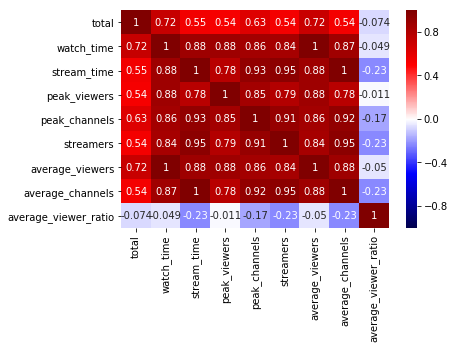

In [915]:
sns.heatmap(df_2018.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);


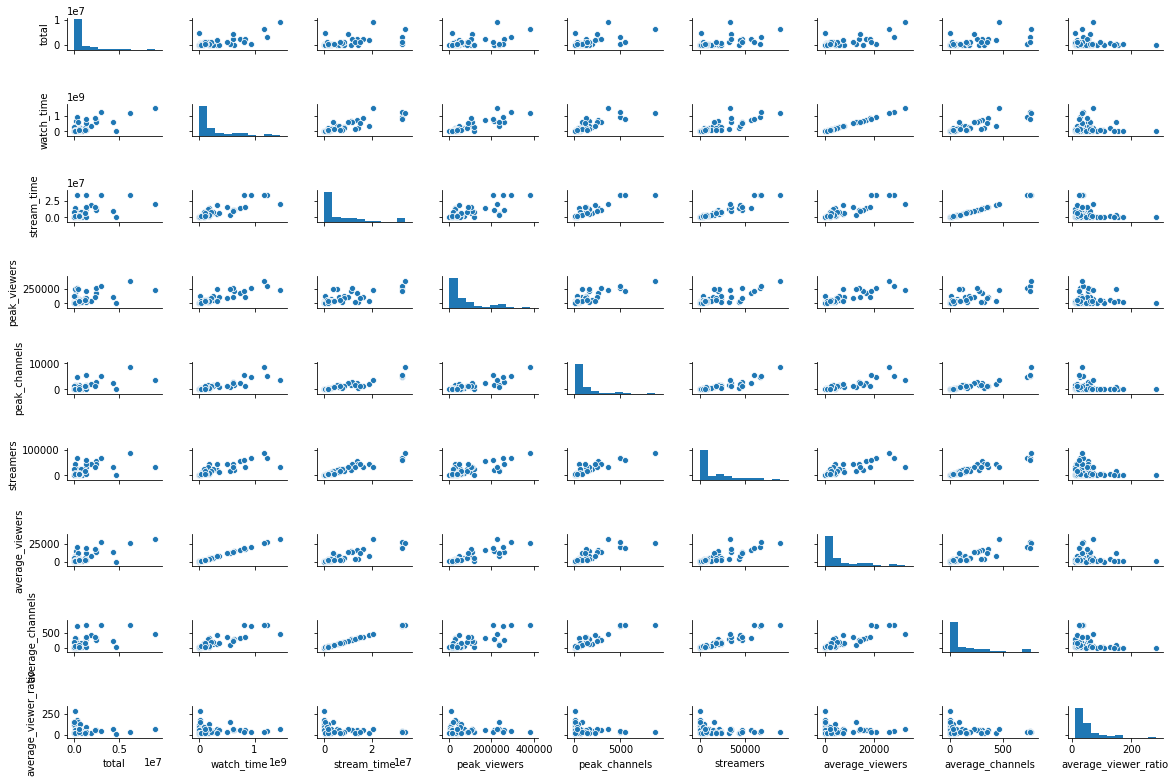

In [916]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(df_2018, height=1.2, aspect=1.5);

In [990]:
# Define the model
lm1 = smf.ols('total ~ watch_time + peak_viewers + peak_channels + average_channels', data=df_2018)

# Fit the model
fit = lm1.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     34.29
Date:                Thu, 18 Jul 2019   Prob (F-statistic):           2.37e-14
Time:                        11:49:17   Log-Likelihood:                -904.26
No. Observations:                  60   AIC:                             1819.
Df Residuals:                      55   BIC:                             1829.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         5.575e+05   1.57e+05      3.544      0.001    2.42e+05    8.73e+05
watch_time           0.0072      0.001      7.790      0.000       0.005       0.009
peak_viewers       -15.7965      3.255     -4.853      0.000     -22.320      -9.273
peak_channels     1057.4965    224.590      4.709      0.000     607.407    1507.586
average_channels -8764.6677   1727.225     -5.074      0.000   -1.22e+04   -5303.231
==============================================================================
Omnibus:                       48.061   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              253.482
Skew:                           2.111   Prob(JB):                     9.06e-56
Kurtosis:                      12.141   Cond. No.                     5.69e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.69e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [993]:
# Define the model
lm1 = smf.ols('log_total ~ watch_time + stream_time + peak_viewers + peak_channels + streamers', data=df_2018)

# Fit the model
fit2 = lm1.fit()

# Print summary statistics of the model's performance
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_total   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     10.80
Date:                Thu, 18 Jul 2019   Prob (F-statistic):           3.12e-07
Time:                        11:49:46   Log-Likelihood:                -80.572
No. Observations:                  60   AIC:                             173.1
Df Residuals:                      54   BIC:                             185.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.4101      0.178     69.888      0.000      12.054      12.766
watch_time     4.044e-09   1.03e-09      3.936      0.000    1.98e-09     6.1e-09
stream_time   -1.375e-07    6.1e-08     -2.253      0.028    -2.6e-07   -1.51e-08
peak_viewers  -1.059e-05   3.68e-06     -2.876      0.006    -1.8e-05   -3.21e-06
peak_channels     0.0004      0.000      1.720      0.091   -7.22e-05       0.001
streamers      4.174e-05   2.12e-05      1.966      0.054   -8.31e-07    8.43e-05
==============================================================================
Omnibus:                        3.449   Durbin-Watson:                   1.634
Prob(Omnibus):                  0.178   Jarque-Bera (JB):                2.783
Skew:                           0.273   Prob(JB):                        0.249
Kurtosis:                       3.902   Cond. No.                     5.83e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.83e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1136]:
# Define the model
lm1 = smf.ols('log_total ~ peak_channels + peak_viewers', data=df_2018)

# Fit the model
fit3 = lm1.fit()

# Print summary statistics of the model's performance
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_total   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     13.95
Date:                Thu, 18 Jul 2019   Prob (F-statistic):           1.17e-05
Time:                        12:16:22   Log-Likelihood:                -89.416
No. Observations:                  60   AIC:                             184.8
Df Residuals:                      57   BIC:                             191.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.4028      0.187     66.158      0.000      12.027      12.778
peak_channels     0.0005      0.000      2.968      0.004       0.000       0.001
peak_viewers  -8.302e-07   3.17e-06     -0.262      0.794   -7.17e-06    5.51e-06
==============================================================================
Omnibus:                        0.161   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.923   Jarque-Bera (JB):                0.080
Skew:                           0.084   Prob(JB):                        0.961
Kurtosis:                       2.936   Cond. No.                     1.49e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

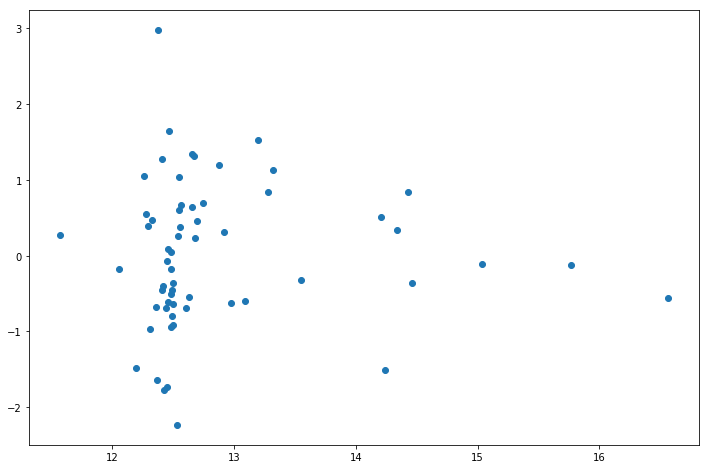

In [983]:
# Use statsmodels to plot the residuals vs the fitted values
plt.figure(figsize=(12,8))
plt.scatter(fit4.predict(), fit4.resid);

In [922]:
df_2018['log_total'] = np.log(df_2018['total'])

In [1169]:
# Define the model
lm1 = smf.ols('log_total ~ peak_viewers + stream_time', data=df_2018)


# Fit the model
fit4 = lm1.fit()

# Print summary statistics of the model's performance
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_total   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     13.40
Date:                Thu, 18 Jul 2019   Prob (F-statistic):           1.70e-05
Time:                        14:33:01   Log-Likelihood:                -89.809
No. Observations:                  60   AIC:                             185.6
Df Residuals:                      57   BIC:                             191.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       12.3122      0.188     65.533      0.000      11.936      12.688
peak_viewers  1.368e-06   2.65e-06      0.516      0.608   -3.94e-06    6.67e-06
stream_time   7.301e-08   2.59e-08      2.820      0.007    2.12e-08    1.25e-07
==============================================================================
Omnibus:                        0.539   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.764   Jarque-Bera (JB):                0.108
Skew:                          -0.013   Prob(JB):                        0.948
Kurtosis:                       3.206   Cond. No.                     1.42e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

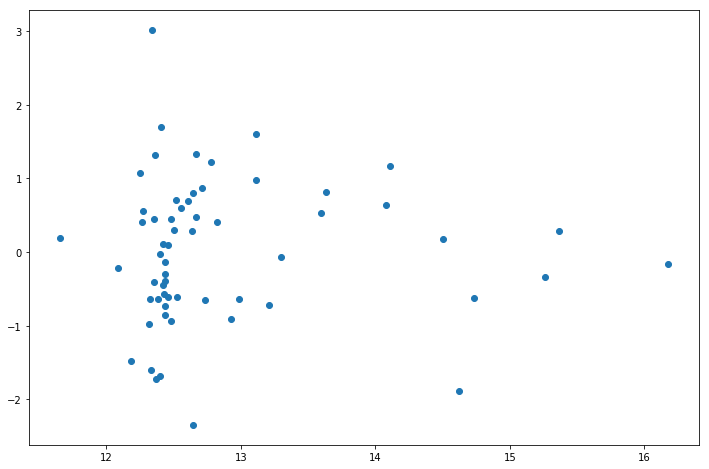

In [985]:
# Use statsmodels to plot the residuals vs the fitted values
plt.figure(figsize=(12,8))
plt.scatter(fit4.predict(), fit4.resid);

## Feature Engineering + Modeling

In [1093]:
X = df_2018.loc[:,['watch_time', 'peak_viewers', 'peak_channels', 'average_channels']]
y = df_2018['total']


In [1094]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # this is used to compute adjusted r_squared
    val_score_2 = 1.0 - (1 - val_score) * (X_val.shape[0] - 1.) / (X_val.shape[0] - X_val.shape[1] - 1.)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('\nValidation Adj R^2 score was:', val_score_2)

    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 

In [1095]:
# for 1st iteration with all columns (fit1)
split_and_validate(X, y)


Validation R^2 score was: 0.45883106362522835

Validation Adj R^2 score was: 0.1495916714110732
Feature coefficient results: 

watch_time : 0.01
peak_viewers : -16.81
peak_channels : 987.01
average_channels : -7892.05


In [1096]:
X1 = df_2018.loc[:,['watch_time', 'peak_viewers', 'peak_channels']]
y1 = df_2018['log_total']

In [1097]:
# for second iteration taking the log of our unit totals
split_and_validate(X1, y1)


Validation R^2 score was: 0.2654179576907526

Validation Adj R^2 score was: -0.010050308175215239
Feature coefficient results: 

watch_time : 0.00
peak_viewers : -0.00
peak_channels : 0.00


In [1098]:
X2 = X1.copy()

# multiplicative interaction between peak channels and viewers
X2['peak_x_av'] = X2['peak_channels'] * X2['peak_viewers']

split_and_validate(X2, y)


Validation R^2 score was: 0.5457958874586122

Validation Adj R^2 score was: 0.2862506802921049
Feature coefficient results: 

watch_time : 0.00
peak_viewers : -6.40
peak_channels : 489.60
peak_x_av : -0.00


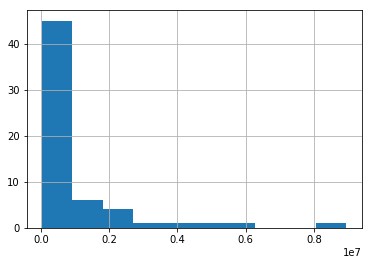

In [1099]:
# create histogram
df_2018.total.hist();

# note the positive skew

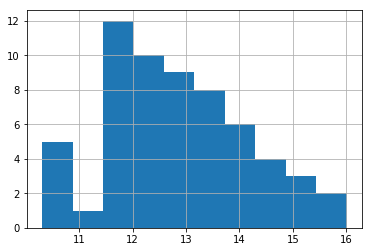

In [1100]:
np.log(df_2018.total).hist();

# it looks better but not very "normal"

Lambda: -0.10939417765916534


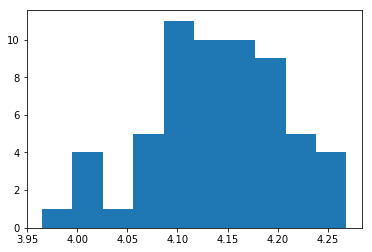

In [1101]:
import scipy.stats as stats


# boxcox transformation on the distribution of total units
lamb=stats.boxcox_normmax(df_2018.total, brack=(-1.9, 1.9)) # don't use "lambda" as it's a Python reserved word
print("Lambda:", lamb)
y_t=(np.power(df_2018.total,-0.2282)-1)/-0.2282

plt.hist(y_t);

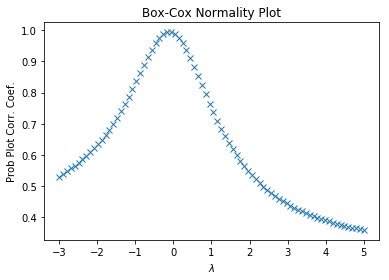

In [1102]:
# plot to show optimal lambda values
fig = plt.figure()
ax = fig.add_subplot(111)
prob = stats.boxcox_normplot(df_2018.total, -3, 5, plot=ax)

## Train / Test / Split

In [1158]:
X = df_2018.loc[:,['watch_time', 'peak_viewers', 'peak_channels', 'average_channels']]
y = df_2018['total']

In [1159]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

X, X_test, y, y_test = train_test_split(X, y, test_size=.2)

In [1160]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25)

In [1161]:
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

/Users/nicksherwin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/nicksherwin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/nicksherwin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/nicksherwin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [1162]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.745
Ridge Regression val R^2: 0.623
Degree 2 polynomial regression val R^2: -0.106


In [1163]:
lm.fit(X,y)
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')

Linear Regression test R^2: 0.756


## Cross Validation

In [1170]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()

cross_val_score(lm, X, y, # estimator, features, target
                cv=3, # number of folds 
                scoring='r2') # scoring metric

array([ 0.56572668, -0.28179705,  0.85630337])

In [1171]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cross_val_score(lm, X, y, cv=kf, scoring='r2')

array([ 0.61213006,  0.73054593, -0.6874575 , -9.50571687, -0.19946948])

In [1172]:
kf = KFold(n_splits=5, shuffle=True, random_state = 1000)

print(np.mean(cross_val_score(lm, X, y, cv=kf, scoring='r2')))
print(np.mean(cross_val_score(lm_reg, X, y, cv=kf, scoring='r2')))

0.05611998073696796
0.056122771537729176
